# Project: Answering Business Questions using SQL

## Introduction: 

In this project, we will use SQL to answer business questions related to a modified version of a database called Chinook. The Chinook database contains information about a fictional digital music shop - kind of like a mini-iTunes store.

The Chinook database contains information about the artists, songs, and albums from the music shop, as well as information on the shop's employees, customers, and the customers purchases. This information is contained in eleven tables. 

Here's a schema diagram for the Chinook database:

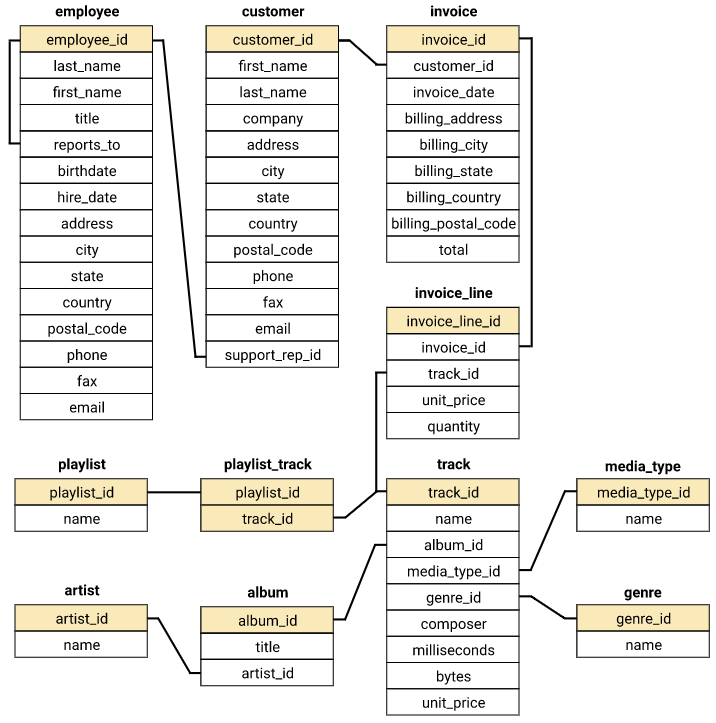

Here are some of the results we got from the analysis.

* "not protected" media type files are more popular than "protected" media type files.
* Rock music is by far the most popular genre of music.
* Almost half of the tracks have never been purchased.
* "Eugene Ormandy" is the most used artist in the playlists.
* About 81% of customers tend to buy single tracks more than purchasing the full album.
* The highest total sales value is in the United States while the lowest is in Portugal and India.
* About 54% of US customers prefer rock music!
* Only 3 sales support agents work for the Chinwook record store, they are Canadian and they were hired in 2017. The youngest was hired at 44!

### Connecting the Jupyter Notebook to the database file


In [1]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

### Returning information on the tables and views in the database

In [2]:
%%sql
SELECT
    name,
    type
FROM sqlite_master
WHERE type IN ("table","view");

 * sqlite:///chinook.db
Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


* return the first five album names from the 'album' table.

In [3]:
%%sql 
SELECT *
FROM album
LIMIT 5

 * sqlite:///chinook.db
Done.


album_id,title,artist_id
1,For Those About To Rock We Salute You,1
2,Balls to the Wall,2
3,Restless and Wild,2
4,Let There Be Rock,1
5,Big Ones,3


## Business question N°1:

The Chinook record store has just signed a deal with a new record label, and you've been tasked with selecting the first three albums that will be added to the store, from a list of four. All four albums are by artists that don't have any tracks in the store right now - we have the artist names, and the genre of music they produce: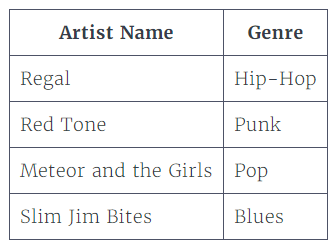

The record label specializes in artists from the USA, and they have given Chinook some money to advertise the new albums in the USA, so we're interested in finding out which genres sell the best in the USA.

so we need to write a query to find out which genres sell the most tracks in the USA.

In [4]:
%%sql
WITH t AS
         (SELECT g.name genre, country 
          FROM customer c
          JOIN invoice i on i.customer_id = c.customer_id
          JOIN invoice_line il on il.invoice_id = i.invoice_id
          JOIN track t on t.track_id = il.track_id
          JOIN genre g on g.genre_id = t.genre_id 
          WHERE c.country = 'USA')
    
SELECT genre, COUNT(*) 'number of tracks sold in the USA', 
       ROUND(CAST(COUNT(*) AS float) * 100 / (SELECT COUNT(*) FROM t),2) 
       'percentage of tracks sold in the USA' 

FROM t
GROUP BY genre
ORDER BY 3 DESC

 * sqlite:///chinook.db
Done.


genre,number of tracks sold in the USA,percentage of tracks sold in the USA
Rock,561,53.38
Alternative & Punk,130,12.37
Metal,124,11.8
R&B/Soul,53,5.04
Blues,36,3.43
Alternative,35,3.33
Pop,22,2.09
Latin,22,2.09
Hip Hop/Rap,20,1.9
Jazz,14,1.33


* About 54% of US customers prefer rock music!

In [5]:
%%sql
WITH t AS
         (SELECT g.name genre, country 
          FROM customer c
          JOIN invoice i on i.customer_id = c.customer_id
          JOIN invoice_line il on il.invoice_id = i.invoice_id
          JOIN track t on t.track_id = il.track_id
          JOIN genre g on g.genre_id = t.genre_id 
          WHERE c.country = 'USA')
    
SELECT genre, COUNT(*) 'number of tracks sold in the USA', 
       ROUND(CAST(COUNT(*) AS float) * 100 / (SELECT COUNT(*) FROM t),2) 
       'percentage of tracks sold in the USA' 

FROM t
GROUP BY genre
HAVING genre like '%blues%' or 
    genre like '%punk%' or 
    genre like '%pop%' or 
    genre like '%hip%'
ORDER BY 3 desc

 * sqlite:///chinook.db
Done.


genre,number of tracks sold in the USA,percentage of tracks sold in the USA
Alternative & Punk,130,12.37
Blues,36,3.43
Pop,22,2.09
Hip Hop/Rap,20,1.9


* Based on the sales of tracks of their genres in the US, we only recommend artists who produce `Punk`, `Blues` and `Pop music`.

## Business question N°2:

Each customer for the Chinook store gets assigned to a sales support agent within the company when they first make a purchase. We have been asked to analyze the purchases of customers belonging to each employee to see if any sales support agent is performing either better or worse than the others.

In [6]:
%%sql
WITH t AS
         (SELECT e.first_name||' '||e.last_name name,birthdate,hire_date
          ,e.country country,i.total
          FROM employee e
          JOIN customer c on e.employee_id = c.support_rep_id
          JOIN invoice i on i.customer_id = c.customer_id
          WHERE e.title = 'Sales Support Agent')
SELECT name,birthdate,hire_date,country,ROUND(SUM(total),2) total_purchases_of_customers
FROM t
GROUP BY 1,2,3,4

 * sqlite:///chinook.db
Done.


name,birthdate,hire_date,country,total_purchases_of_customers
Jane Peacock,1973-08-29 00:00:00,2017-04-01 00:00:00,Canada,1731.51
Margaret Park,1947-09-19 00:00:00,2017-05-03 00:00:00,Canada,1584.0
Steve Johnson,1965-03-03 00:00:00,2017-10-17 00:00:00,Canada,1393.92


* Only 3 sales support agents work for the Chinwook record store.
* all sales support agents are from Canada.
* all sales support agents were over 40 when hired.
* all sales support agents were hired in 2017.
* Purchases of customers belonging to each sales support agent are positively correlated with their years of experience.

## Business question N°3:

We have been asked to analyze the sales data for customers from each different country on the:

* total number of customers
* total value of sales
* average value of sales per customer
* average order value

Because there are a number of countries with only one customer, we were asked to group these customers as "Other" in our analysis.

The function of the temporary tables used in the sql query:
* `temporary table t`: joining **invoice** and **customer** tables and selecting country, customr_id and total sales.
* `temporary table t1` : group **t** by country and selecting country, the total number of customers for each country, the number of orders for each country, the total value of sales for each country and highlighting countries that have only one customer as "Other".
* `temporary table t2` : calculating the total number of customers, the total value of sales, the average value of sales per customer and the average order value for each group of countries in **t1**.
* `temporary table t3` : sort **t2** by the total sales from highest to lowest, with the "Other" group at the very bottom.

In [7]:
%%sql
WITH t AS 
         (SELECT c.country country,c.customer_id customer_id, i.total total
          FROM customer c
          JOIN invoice i on c.customer_id = i.customer_id),
    
     t1 AS
         (SELECT country ,COUNT(DISTINCT(customer_id)) 'total number of customers',
                 COUNT(customer_id) 'orders value',
                 SUM(total) "total value of sales",
                 CASE 
                 WHEN COUNT(DISTINCT(customer_id)) = 1 THEN 'Other'
                 ELSE country
                 END other_country
          FROM t
          GROUP BY country),
    t2 AS
         (SELECT other_country country,
             SUM(t1."total number of customers") "total number of customers",
             SUM(t1."total value of sales") "total value of sales",
             SUM(t1."total value of sales") / SUM(t1."total number of customers") "average value of sales per customer",
             SUM(t1."total value of sales") / SUM(t1."orders value") "average order value"
           FROM t1
           GROUP BY other_country
           ORDER BY "total value of sales" desc),
     
     t3 AS 
          (SELECT country,  "total number of customers",
           "total value of sales","average order value",
            "average value of sales per customer"
           FROM (SELECT t2.*,CASE
                       WHEN country = 'Other' THEN 1
                       ELSE 0
                       END sort
                  FROM t2
                  ORDER BY sort asc))
    
SELECT *
FROM t3

 * sqlite:///chinook.db
Done.


country,total number of customers,total value of sales,average order value,average value of sales per customer
USA,13,1040.4899999999998,7.942671755725189,80.0376923076923
Canada,8,535.5900000000001,7.047236842105265,66.94875000000002
Brazil,5,427.68000000000006,7.0111475409836075,85.53600000000002
France,5,389.0699999999999,7.781399999999998,77.81399999999998
Germany,4,334.62,8.161463414634147,83.655
Czech Republic,2,273.24000000000007,9.108000000000002,136.62000000000003
United Kingdom,3,245.52,8.768571428571429,81.84
Portugal,2,185.13000000000002,6.383793103448276,92.56500000000001
India,2,183.14999999999998,8.72142857142857,91.57499999999999
Other,15,1094.9399999999998,7.4485714285714275,72.996


* The highest total sales value is in the United States while the lowest is in Portugal and India.

## Business question N°4:

Management are currently considering changing their purchasing strategy to save money. The strategy they are considering is to purchase only the most popular tracks from each album from record companies, instead of purchasing every track from an album.

We have been asked to find out what percentage of purchases are individual tracks vs whole albums, so that management can use this data to understand the effect this decision might have on overall revenue.

We will write a query that categorizes each invoice as either an album purchase or not, and calculates the following summary statistics:
* Number of invoices
* Percentage of invoices

The definition used here of what constitutes an album purchase is a purchase that contains a full album and nothing more, just as long as that album has more than two tracks.

The function of the temporary tables used in the sql query:
* `temporary table t`: joining **invoice** and **track** tables, grouping the resulting table by invoice_id and album_id and selecting invoice_id, album_id and the number of purchased tracks for each pair of invoice_id and album_id.
* `temporary table t1`: joining **album** and **track** tables, grouping the resulting table by album_id and selecting album_id and the number of tracks in each album.
* `temporary table t2`: joining **t** and **t1**, selecting invoice_id, album_id, the number of purchased tracks for each pair of invoice_id and album_id, the number of tracks in each album and highlighting purchases where the number of tracks in album is bigger than 2 and equal to the number of purchased tracks as 'album_purchase'.
* `temporary table t3`: grouping **t2** by invoice_id and selecting invoice_id and album_purchase.

In [8]:
%%sql
WITH t AS
     (SELECT i.invoice_id,t.album_id,COUNT(t.track_id) tracks_bought
      FROM invoice i
      JOIN invoice_line il on i.invoice_id = il.invoice_id
      JOIN track t on t.track_id = il.track_id
      GROUP BY i.invoice_id,t.album_id),
    
    t1 AS
      (SELECT a.album_id, COUNT(t.track_id) tracks_in_album
       FROM track t
       JOIN album a on a.album_id = t.album_id
       GROUP BY 1),
        
    t2 AS
       (SELECT t.*,t1.tracks_in_album,case
               WHEN tracks_in_album = tracks_bought AND tracks_in_album >= 2 THEN 'yes'
               ELSE 'no'
               END album_purchase
        FROM t
        JOIN t1 on t.album_id = t1.album_id
        ),
    
    t3 AS
    
       (SELECT invoice_id,t2.album_purchase
        FROM t2
        GROUP BY invoice_id)

SELECT album_purchase,COUNT(*) number_of_invoice, 
     CAST(COUNT(*) AS float) *100 / (SELECT COUNT(DISTINCT(invoice_id))FROM t) 'percentage %'
FROM t3
GROUP BY 1

 * sqlite:///chinook.db
Done.


album_purchase,number_of_invoice,percentage %
no,503,81.92182410423453
yes,111,18.078175895765472


About 81% of customers tend to buy single tracks more than purchasing the full album, so as a strategy to save money it would be profitable to purchase only the most popular tracks from each album from record companies rather than buying a full album.

## Business question N°5: Which artist is used in the most playlists?

In [9]:
%%sql
SELECT name,COUNT(*) number_of_appearances_in_playlists
FROM
    (SELECT playlist_id, ar.name
     FROM track t 
     JOIN album al on al.album_id = t.album_id
     JOIN artist ar on ar.artist_id = al.artist_id
     JOIN playlist_track pl on pl.track_id = t.track_id
     GROUP BY 1,2)
GROUP BY name
ORDER BY 2 desc
LIMIT 5

 * sqlite:///chinook.db
Done.


name,number_of_appearances_in_playlists
Eugene Ormandy,7
The King's Singers,6
English Concert & Trevor Pinnock,6
Berliner Philharmoniker & Herbert Von Karajan,6
Academy of St. Martin in the Fields & Sir Neville Marriner,6


"Eugene Ormandy" is the most used artist in the playlists.

## Business question N°6: How many tracks have been purchased vs not purchased?

In [10]:
%%sql
WITH purchased_track AS
                 (SELECT DISTINCT(t.track_id) 
                  FROM track t
                  JOIN invoice_line il on t.track_id = il.track_id),

            t AS 
                 (SELECT track_id, CASE
                         WHEN track_id in purchased_track THEN 'purchased'
                         ELSE 'not purchased'
                         END tracks
                  FROM track)
        
SELECT tracks, COUNT(*) N°
from t
GROUP BY tracks
ORDER BY 2 DESC


 * sqlite:///chinook.db
Done.


tracks,N°
purchased,1806
not purchased,1697


Almost half of the tracks have never been purchased, The company need to find a way to advertise those tracks.

## Business question N°7: Is the range of tracks in the store reflective of their sales popularity?

In [11]:
%%sql
SELECT g.name genre, COUNT(*) purchased_tracks_per_genre
FROM track t 
JOIN genre g on g.genre_id = t.genre_id
JOIN invoice_line il on il.track_id = t.track_id
GROUP BY g.name
ORDER BY 2 desc

 * sqlite:///chinook.db
Done.


genre,purchased_tracks_per_genre
Rock,2635
Metal,619
Alternative & Punk,492
Latin,167
R&B/Soul,159
Blues,124
Jazz,121
Alternative,117
Easy Listening,74
Pop,63


Rock music is by far the most popular genre of music.

## Business question N°8: Do protected vs non-protected media types have an effect on popularity?

" A protected media file is a media file with associated content usage rules that prevent a song, for example, from being copied or shared. "

Let's find out the different media types used in the Chinwook database. 

In [12]:
%%sql
SELECT DISTINCT(name)
FROM media_type

 * sqlite:///chinook.db
Done.


name
MPEG audio file
Protected AAC audio file
Protected MPEG-4 video file
Purchased AAC audio file
AAC audio file


In [13]:
%%sql
WITH purchased_tracks_media_type AS
        (SELECT t.track_id,mt.name, CASE
                WHEN mt.name LIKE '%protected%' THEN 'protected'
                ELSE 'not protected'
                END media_type
          FROM track t 
          JOIN media_type mt on mt.media_type_id = t.media_type_id
          JOIN invoice_line il on il.track_id = t.track_id)
    
SELECT media_type, COUNT(track_id) popularity
FROM purchased_tracks_media_type
GROUP BY 1
ORDER BY 2 desc


 * sqlite:///chinook.db
Done.


media_type,popularity
not protected,4315
protected,442


"not protected" media type files are more popular than "protected" media type files.